# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [2]:
# importing packages
import pandas as pd 
import numpy as np

In [3]:
# importing data file
data = pd.read_csv('Wholesale_Data.csv')

In [4]:
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [5]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test = train_test_split(data, test_size=0.2, random_state=42)

In [6]:
X_train.shape

(352, 8)

In [7]:
# checking null values 
X_train.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [8]:
# checking duplicate values
X_train.duplicated().sum()

0

In [9]:
# checking data types
X_train.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

### Checking the distribution of the data for all columns

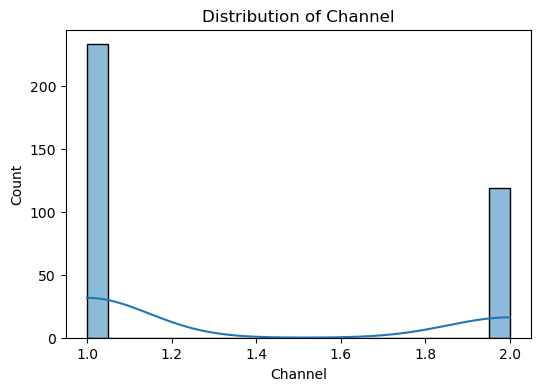

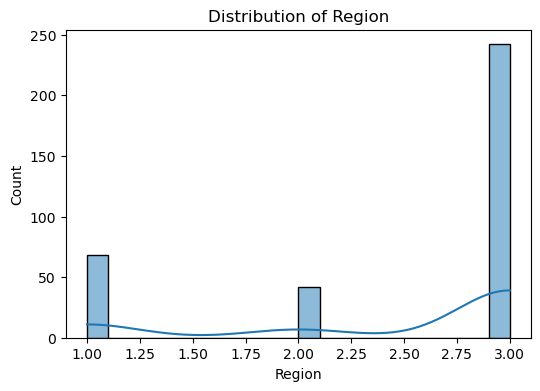

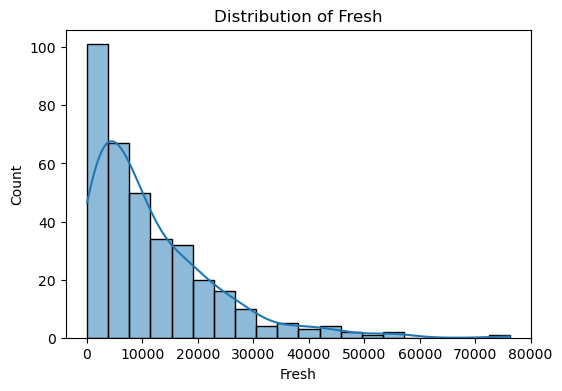

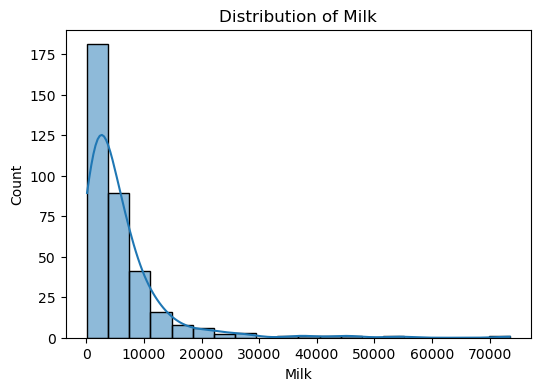

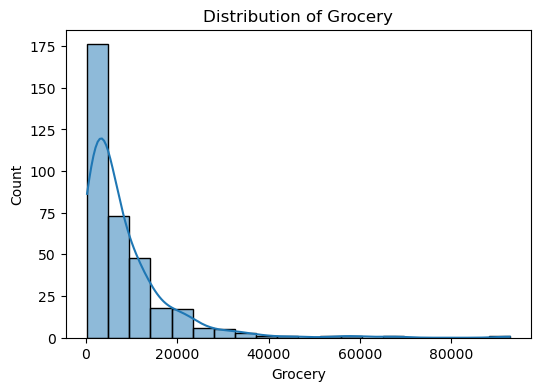

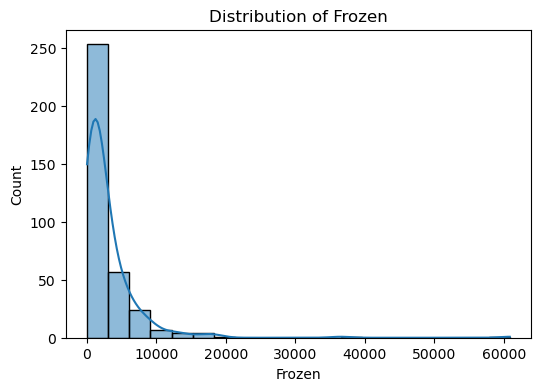

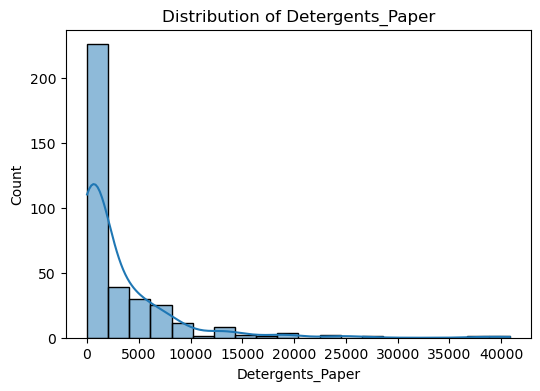

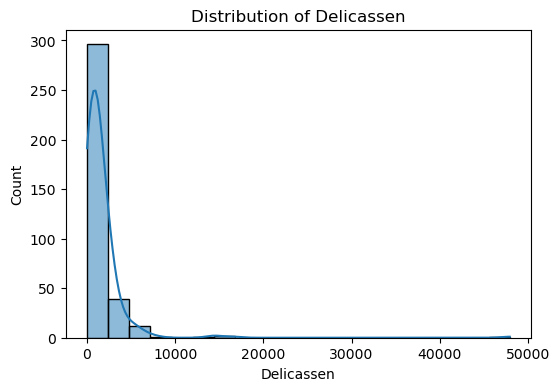

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# creating histogram for all columns

for col in X_train.columns:
    
  plt.figure(figsize=(6,4))
  sns.histplot(data=X_train[col],bins=20, kde=True)
  plt.title(f'Distribution of {col}')
  plt.show()

In [11]:
# Describing data statistically 
X_train.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000
mean,1.338068,2.494318,11522.650568,5890.048295,8166.241477,2932.426136,3028.857955,1570.218750
std,0.473725,0.798839,11339.250187,7689.050714,10047.804806,4755.733393,5059.782371,3062.706952
min,1.000000,1.000000,3.000000,112.000000,218.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3126.250000,1587.750000,2156.500000,761.250000,256.750000,405.750000
50%,1.000000,3.000000,8130.000000,3687.000000,4855.500000,1498.000000,832.000000,974.500000
75%,2.000000,3.000000,16933.750000,7166.250000,10725.500000,3532.500000,4038.750000,1820.250000
max,2.000000,3.000000,76237.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### As seen from the plots a lot of data is skewed and there also could be potential outliers as for some features data points takes a big jump after 3rd quartile(75%)

In [12]:
X_train.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.084139,-0.157258,0.463697,0.596117,-0.185622,0.625775,0.047013
Region,0.084139,1.000000,0.018272,0.040902,0.013851,-0.050308,0.002602,0.060004
Fresh,-0.157258,0.018272,1.000000,0.087746,-0.008747,0.334326,-0.096436,0.250026
Milk,0.463697,0.040902,0.087746,1.000000,0.728516,0.129047,0.669252,0.398482
Grocery,0.596117,0.013851,-0.008747,0.728516,1.000000,-0.018635,0.930833,0.192295
Frozen,-0.185622,-0.050308,0.334326,0.129047,-0.018635,1.000000,-0.115978,0.426402
Detergents_Paper,0.625775,0.002602,-0.096436,0.669252,0.930833,-0.115978,1.000000,0.058435
Delicassen,0.047013,0.060004,0.250026,0.398482,0.192295,0.426402,0.058435,1.000000


<Axes: >

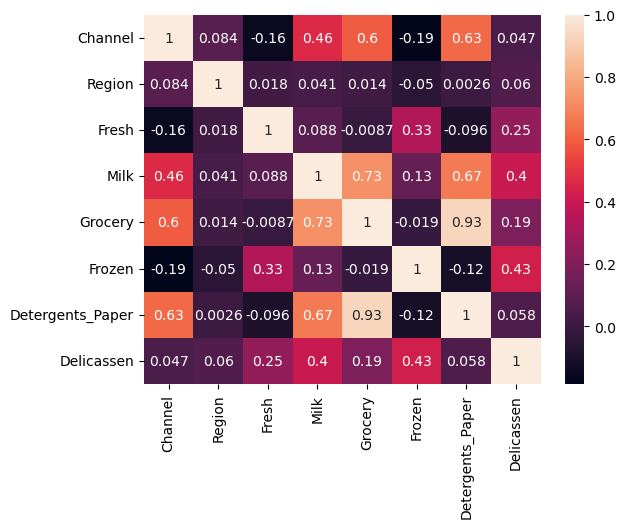

In [30]:
# checking correlation matrix between all columns
import seaborn as sns

correlation_matrix = X_train.corr()

# creating heatmap for correlation matrix
sns.heatmap(correlation_matrix, annot=True)

### Identifying outliers

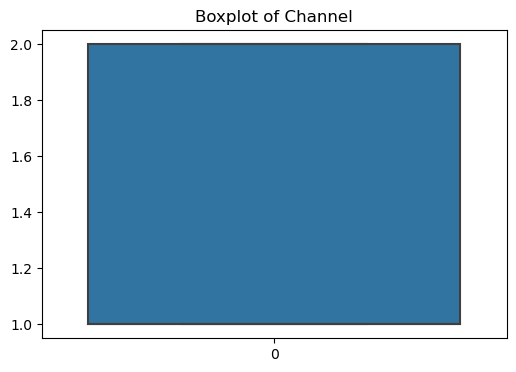

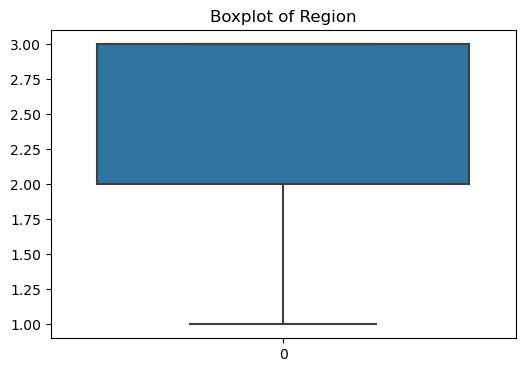

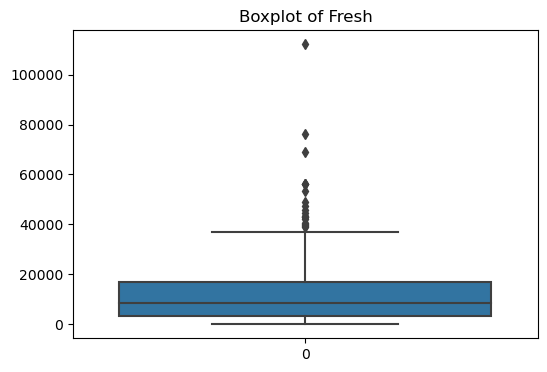

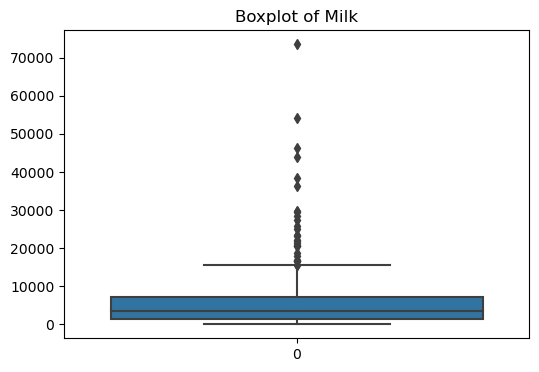

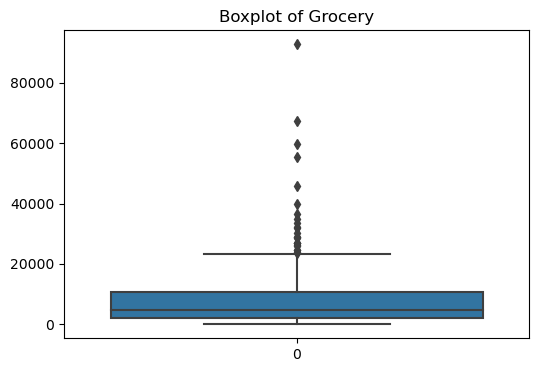

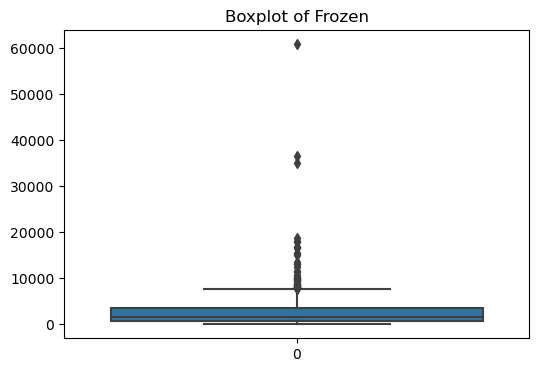

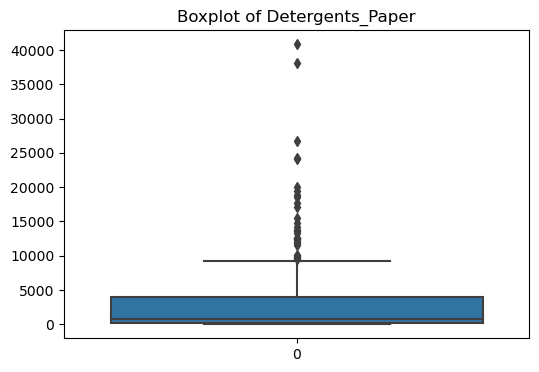

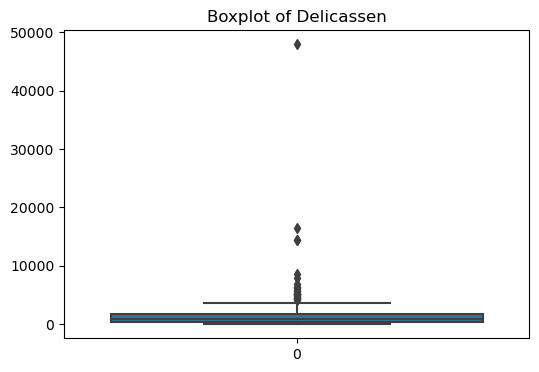

In [36]:
# draw boxplot for all columns
for col in data.columns:
    
  plt.figure(figsize=(6,4))
  sns.boxplot(data=data[col])
  plt.title(f'Boxplot of {col}')
  plt.show()

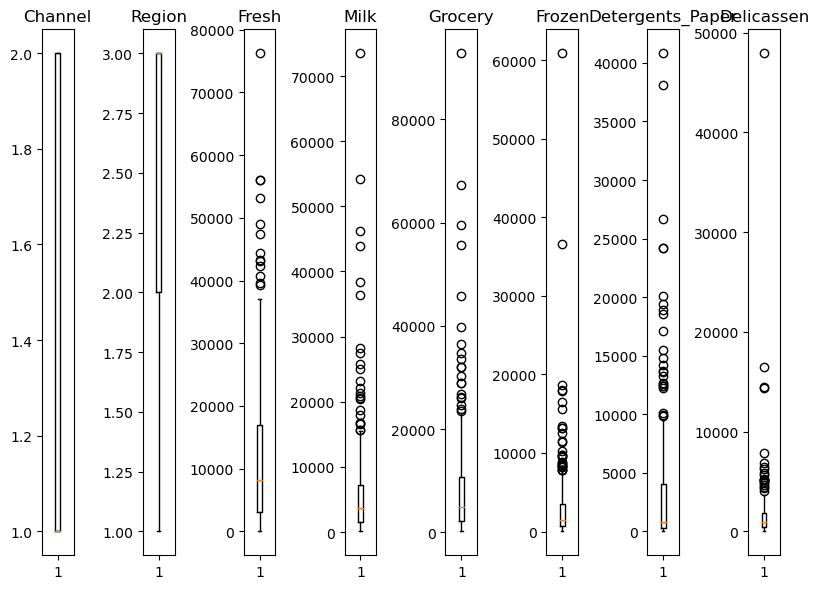

In [39]:
# Create a boxplot for all columns
plt.figure(figsize=(8, 6))  # Set the size of the figure

# Loop through all columns and create a boxplot for each
for column in X_train.columns:
    plt.subplot(1, len(X_train.columns), X_train.columns.get_loc(column) + 1)
    plt.boxplot(X_train[column])
    plt.title(column)

plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()  # Display the boxplots


### There are outliers present in the data  as per boxplot

In [40]:
def check_outliers(dataframe):
    all_outliers = []  # Initialize an empty list to store outliers

    for column in dataframe.columns:
        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        IQR = Q3 - Q1
        
        column_outliers = dataframe[(dataframe[column] < (Q1 - 1.5*IQR)) | (dataframe[column] > (Q3 + 1.5*IQR))]
        
        # Append the outliers for the current column to the list
        all_outliers.append(column_outliers)
        
    return all_outliers

In [41]:
outliers = check_outliers(X_train)

### Handeling Outliers by replacing the outliers more than upper limit with the upper limit and less than lower limit with the lower limit

In [42]:
def handle_outliers(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    dataframe[column] = dataframe[column].apply(lambda x: upper_limit if x > upper_limit else lower_limit if x < lower_limit else x)


In [43]:
# Handle outliers for each feature
for column in data.columns:
    handle_outliers(X_train, column)

In [44]:
# checking outliers after handeling itb
check_outliers(X_train)

[Empty DataFrame
 Columns: [Channel, Region, Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen]
 Index: [],
 Empty DataFrame
 Columns: [Channel, Region, Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen]
 Index: [],
 Empty DataFrame
 Columns: [Channel, Region, Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen]
 Index: [],
 Empty DataFrame
 Columns: [Channel, Region, Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen]
 Index: [],
 Empty DataFrame
 Columns: [Channel, Region, Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen]
 Index: [],
 Empty DataFrame
 Columns: [Channel, Region, Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen]
 Index: [],
 Empty DataFrame
 Columns: [Channel, Region, Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen]
 Index: [],
 Empty DataFrame
 Columns: [Channel, Region, Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen]
 Index: []]

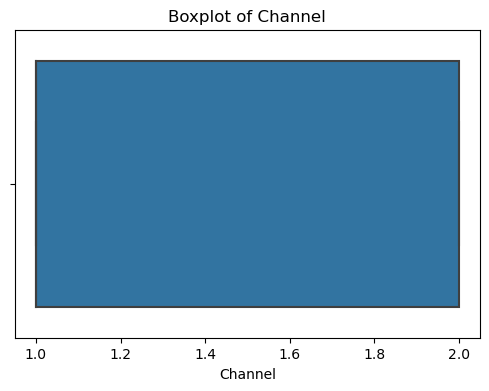

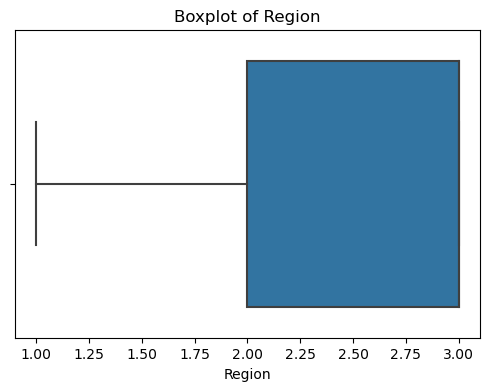

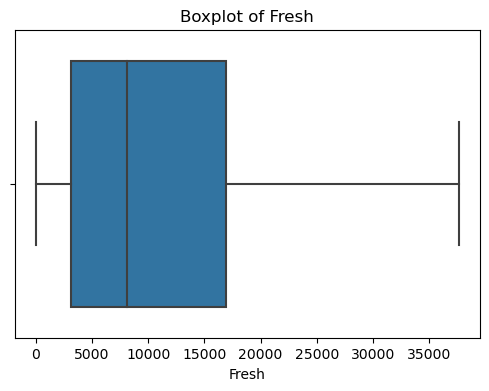

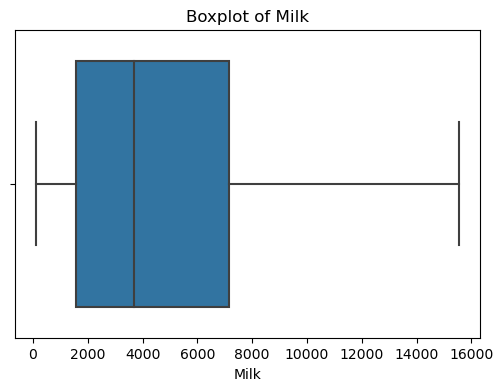

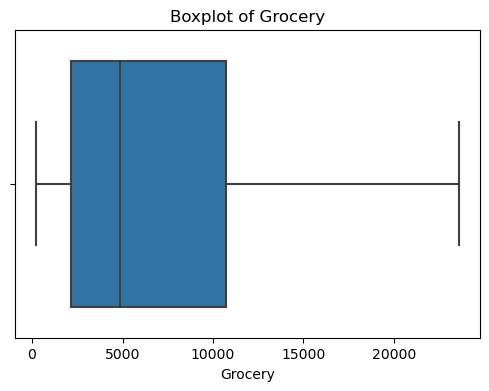

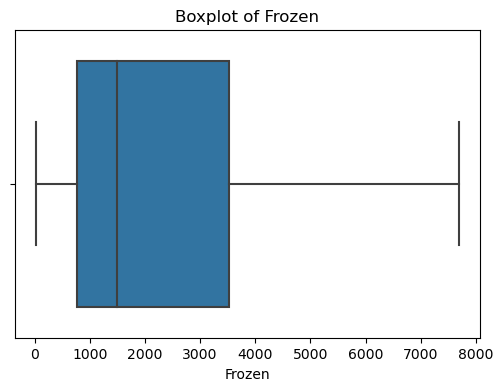

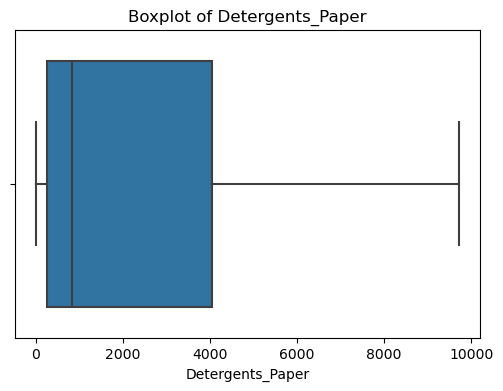

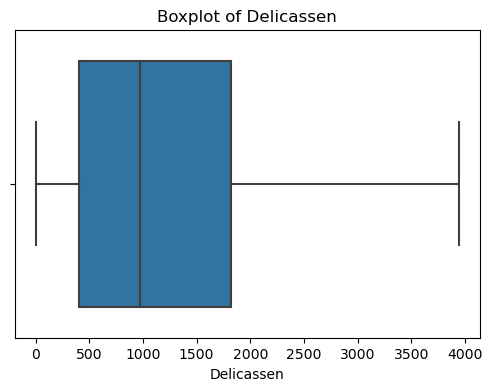

In [52]:
# draw boxplot for all columns 
for col in X_train.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=X_train[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

### Outliers has been adjusted

<Axes: >

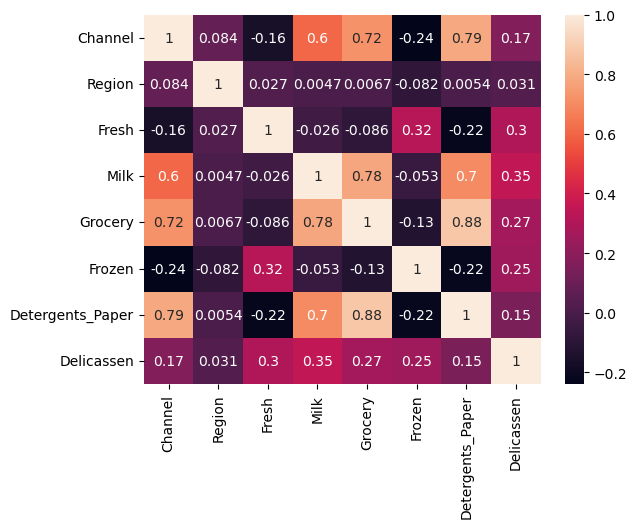

In [53]:
# checking correlation matrix between all columns after adjusting outliers
import seaborn as sns

correlation_matrix = X_train.corr()

# creating heatmap for correlation matrix
sns.heatmap(correlation_matrix, annot=True)

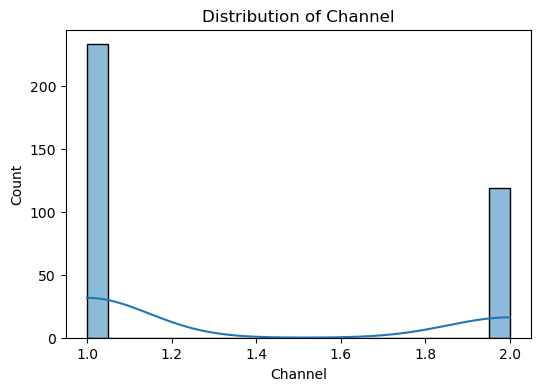

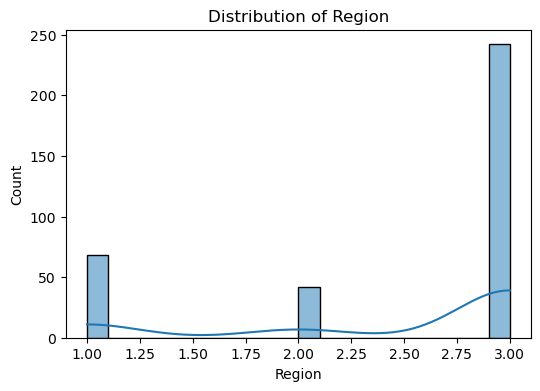

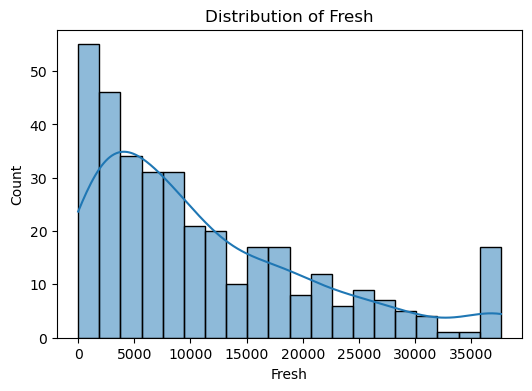

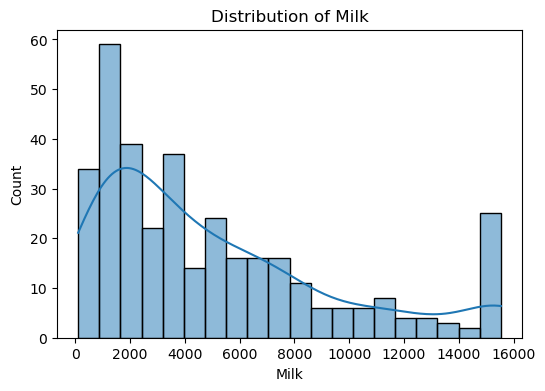

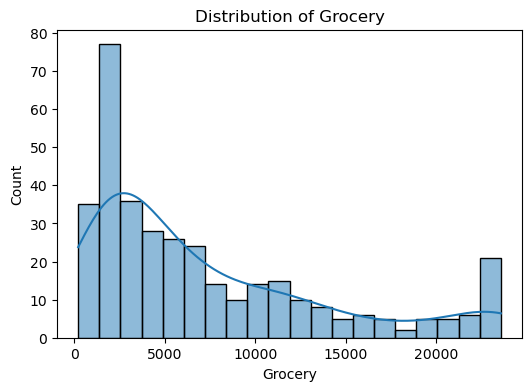

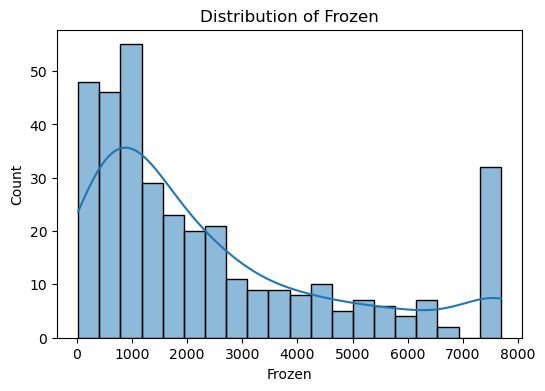

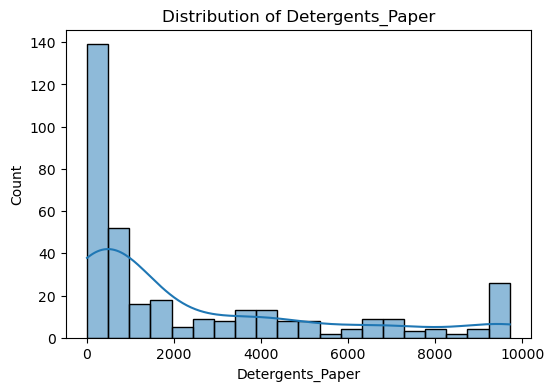

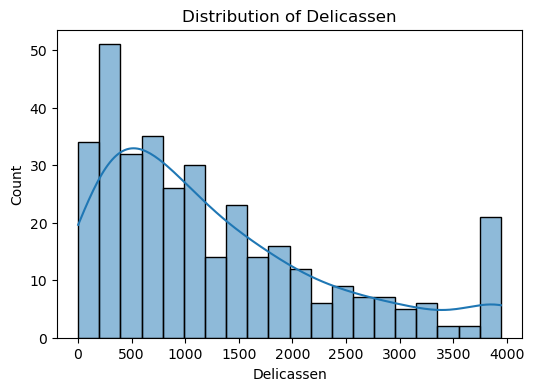

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# creating histogram for all columns

for col in X_train.columns:
    
  plt.figure(figsize=(6,4))
  sns.histplot(data=X_train[col],bins=20, kde=True)
  plt.title(f'Distribution of {col}')
  plt.show()

### Distribution is much normal after adjusting outliers for the data

#### Most of the clustering algorithms are sensitive to scale of the data so scaling the data

In [55]:
from sklearn.preprocessing import StandardScaler

# create a standardscalar object
scaler = StandardScaler()

data_scaled = scaler.fit_transform(X_train)

------------

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

In [56]:
# Trying to find the optimal k by elbow method
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# empty list to append the errors for eack interation 
scores = []

cluster = range(1,15) #range of K values to try

for k in cluster:
   kmeans = KMeans(n_clusters=k, random_state=42)
   kmeans.fit(data_scaled)
   scores.append(kmeans.inertia_)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

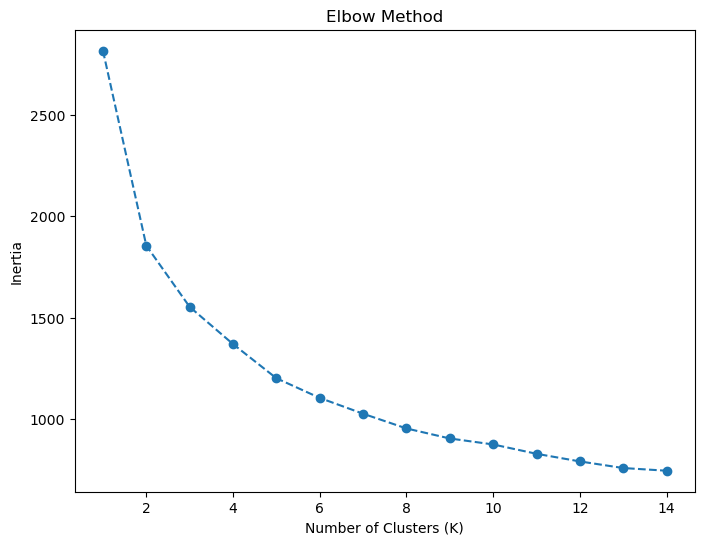

In [57]:
# plot the elbow method
plt.figure(figsize=(8,6))
plt.plot(cluster, scores, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel("Number of Clusters (K)")
plt.ylabel('Inertia')
plt.show()

#### As seen on the graph the change is steady after 4, so we will keep 4 clusters

In [58]:
# create the k-means clustering with 4 clusters we got from Elbow method
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_scaled)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [59]:
# retreive cluster label
cluster_labels = kmeans.labels_

In [60]:
# adding the cluster to the dataframe
X_train['Cluster'] = cluster_labels

In [61]:
# checking the cluster size
X_train['Cluster'].value_counts()

0    123
3    107
2     65
1     57
Name: Cluster, dtype: int64

In [62]:
# Check the characteristics of each cluster
for i in range(4):
    print("\nCluster ", i)
    print(X_train[X_train['Cluster'] == i].describe())


Cluster  0
         Channel      Region         Fresh          Milk       Grocery  \
count  123.00000  123.000000    123.000000    123.000000    123.000000   
mean     1.04878    2.975610   8826.390244   2514.520325   3075.666667   
std      0.21629    0.154888   7595.607043   2093.860394   2459.567314   
min      1.00000    2.000000      3.000000    112.000000    218.000000   
25%      1.00000    3.000000   3127.000000   1017.000000   1644.500000   
50%      1.00000    3.000000   6987.000000   1882.000000   2280.000000   
75%      1.00000    3.000000  12294.500000   3489.000000   3896.500000   
max      2.00000    3.000000  37645.000000  11006.000000  16483.000000   

            Frozen  Detergents_Paper   Delicassen  Cluster  
count   123.000000        123.000000   123.000000    123.0  
mean   1687.726626        665.365854   825.699187      0.0  
std    1564.142251        862.708253   737.883103      0.0  
min      47.000000          3.000000     3.000000      0.0  
25%     567.5000

In [63]:
# calculating the mean values for features per clusters
cluster_means = X_train.groupby(by='Cluster').mean()

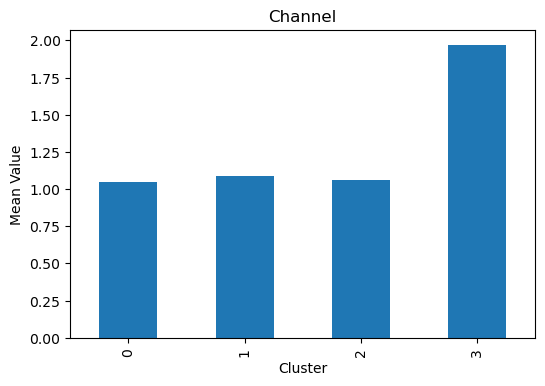

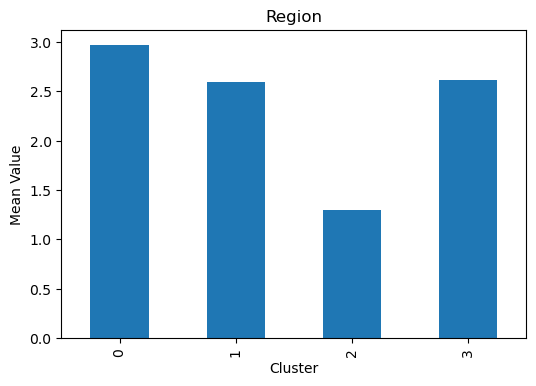

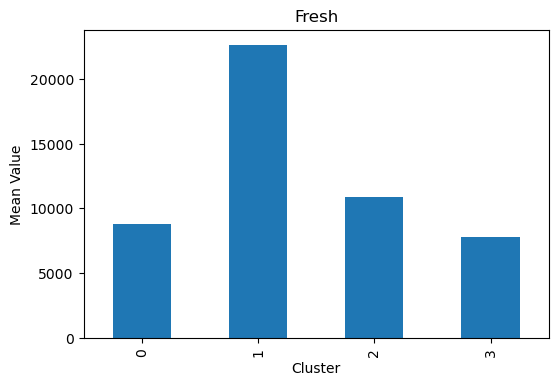

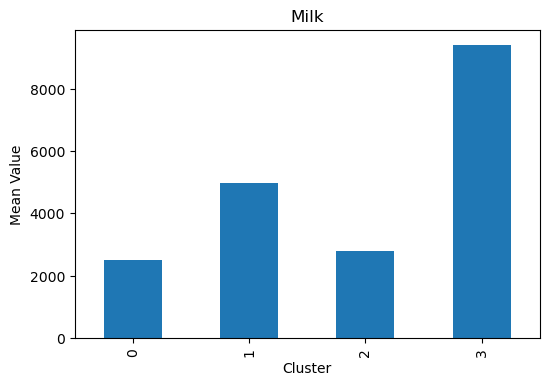

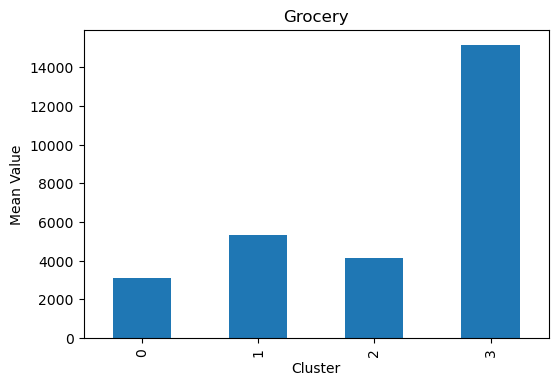

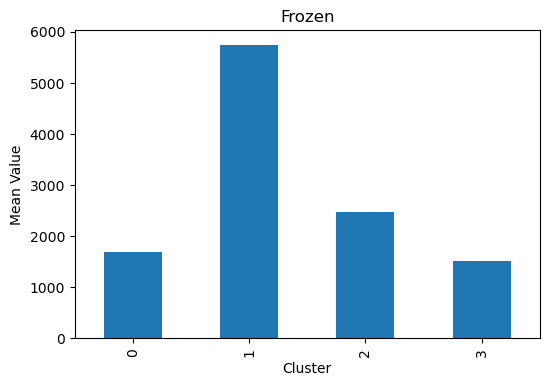

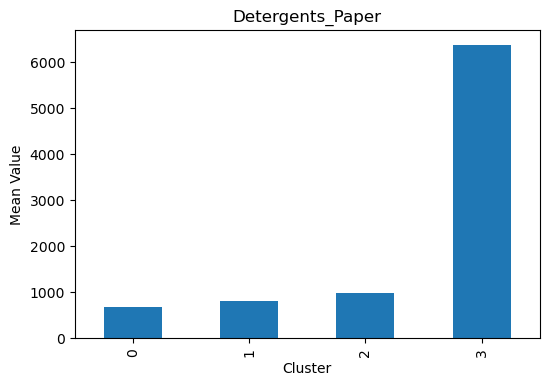

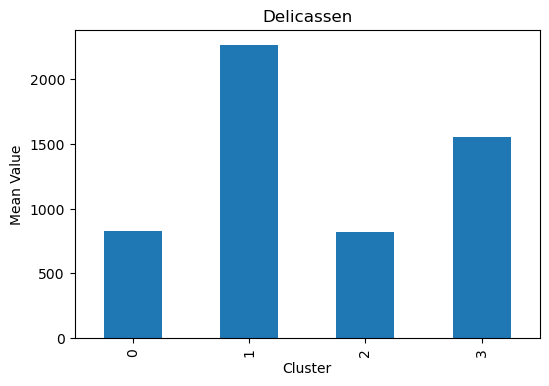

In [64]:
# Transpose the DataFrame so that the features are the rows (this will make plotting easier)
cluster_means = cluster_means.transpose()

# Create bar plot for each feature
for feature in cluster_means.index:
    cluster_means.loc[feature].plot(kind='bar', figsize=(6,4))
    plt.title(feature)
    plt.ylabel('Mean Value')
    plt.show()

## From the Charts above we can see how all the similar features are clustered together
## You can conform it with the correlation matrix

In [75]:
# Predict cluster labels for the test data
test_data_cluster_labels = kmeans.predict(X_test)

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


----------------

In [76]:
test_data_cluster_labels

array([3, 1, 1, 1, 3, 1, 3, 3, 1, 1, 1, 1, 3, 1, 3, 1, 1, 3, 1, 1, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 3, 3, 1, 1, 3, 1, 1, 3,
       3, 1, 1, 3, 3, 1, 3, 1, 1, 1, 3, 3, 1, 3, 3, 3, 1, 1, 1, 3, 1, 3,
       1, 3, 1, 1, 3, 1, 3, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 3, 3, 1, 1, 3])

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

### Creating Dendogram to see the clusters forming together based on similarity.
### Selecting Euclidean distance for distance metric
### Selecting Ward Linkage:
                 Merge clusters to minimize the increase in the sum of squared distances within clusters 

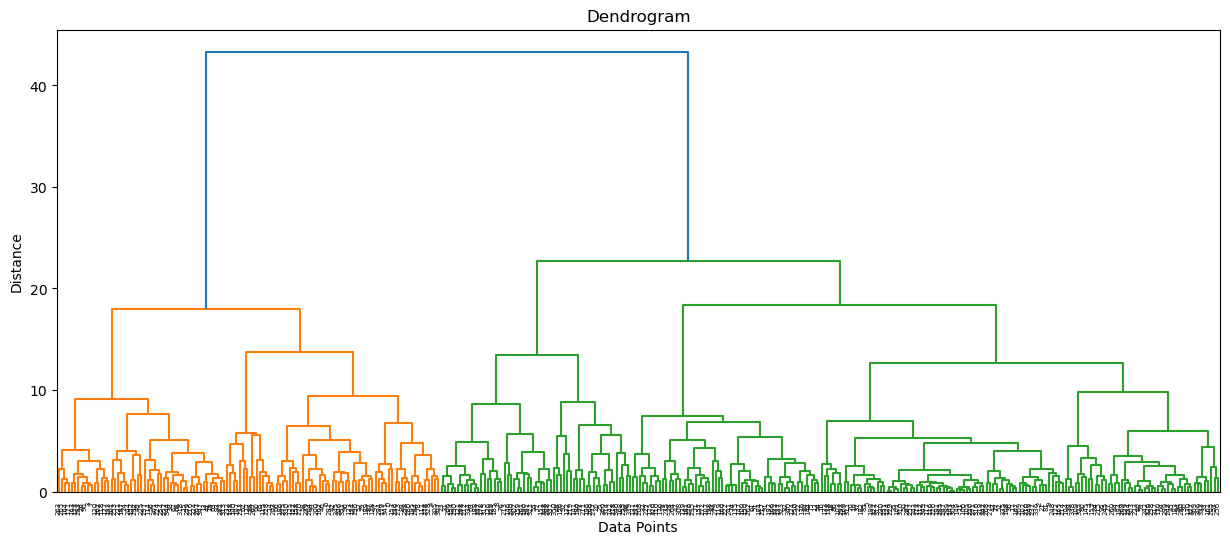

In [65]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

linkage_method = 'ward'
d = linkage(data_scaled, method=linkage_method, metric='euclidean')


# Plot the dendrogram to determine the optimal number of clusters
plt.figure(figsize=(15, 6))
dendrogram(d)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()




In [66]:
# Based on the dendrogram, selecting a cut-off point
cut_off_distance = 20  
clusters = fcluster(d, t=cut_off_distance, criterion='distance')

In [67]:
# copying the original dataframe and adding the clusters observed from dendogram
data_dendo = X_train.copy()

In [68]:
# add the clusters to copied data 
data_dendo['Cluster'] = clusters

In [69]:
# Check the characteristics of each cluster
for i in range(1,5):
    print("\nCluster ", i)
    print(data_dendo[data_dendo['Cluster'] == i].describe())


Cluster  1
       Channel     Region         Fresh         Milk       Grocery  \
count    116.0  116.00000    116.000000    116.00000    116.000000   
mean       2.0    2.62069   8897.206897   8883.75000  14278.543103   
std        0.0    0.70594   8954.504368   4232.80106   6228.624987   
min        2.0    1.00000     23.000000   1124.00000   4523.000000   
25%        2.0    2.75000   2337.250000   6014.75000   9532.500000   
50%        2.0    3.00000   6057.500000   7812.00000  12473.000000   
75%        2.0    3.00000  12239.250000  12402.50000  20429.500000   
max        2.0    3.00000  37645.000000  15534.00000  23579.000000   

            Frozen  Detergents_Paper   Delicassen  Cluster  
count   116.000000        116.000000   116.000000    116.0  
mean   1522.322198       5969.741379  1518.068966      1.0  
std    1431.425615       2747.323187  1176.371871      0.0  
min      33.000000        523.000000     3.000000      1.0  
25%     538.750000       3864.750000   541.500000   

In [70]:
# calculating the mean values for features per clusters
cluster_means = data_dendo.groupby(by='Cluster').mean()

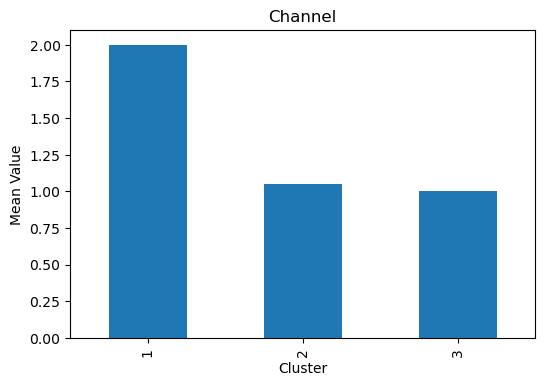

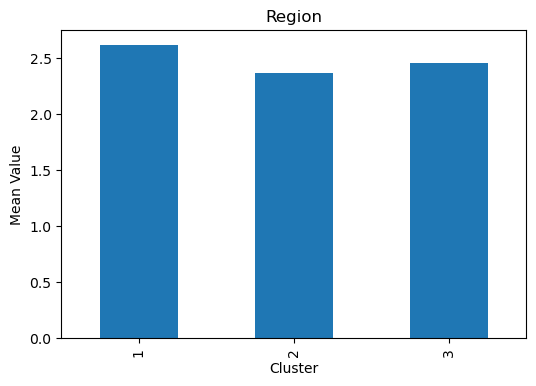

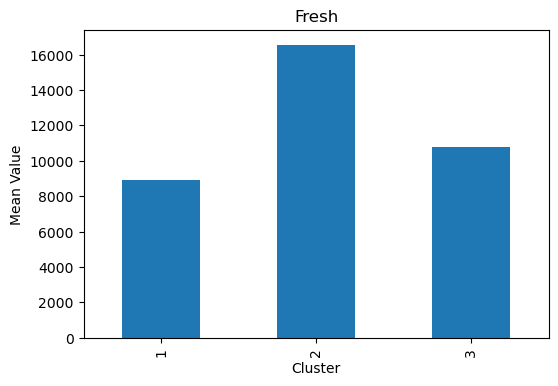

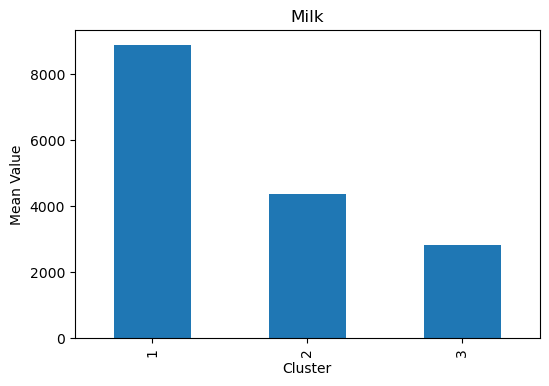

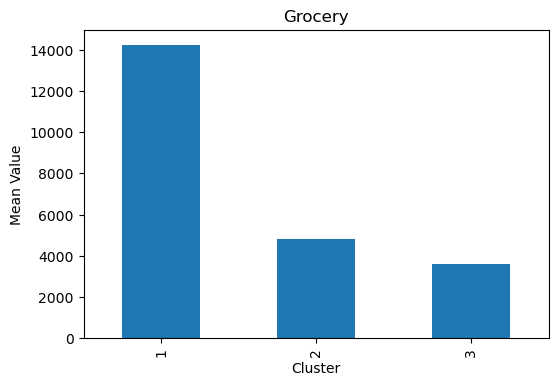

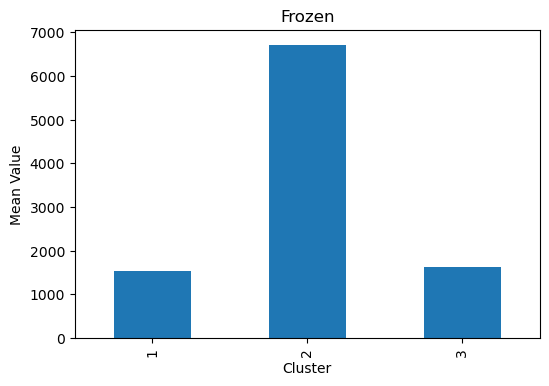

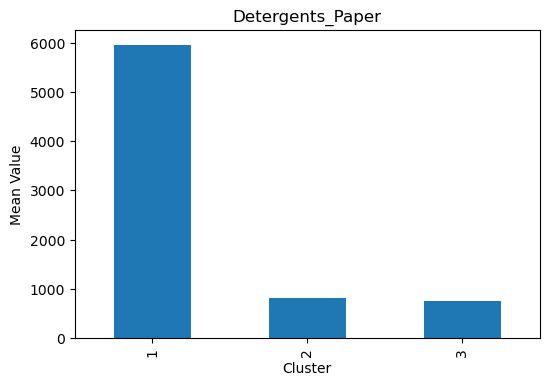

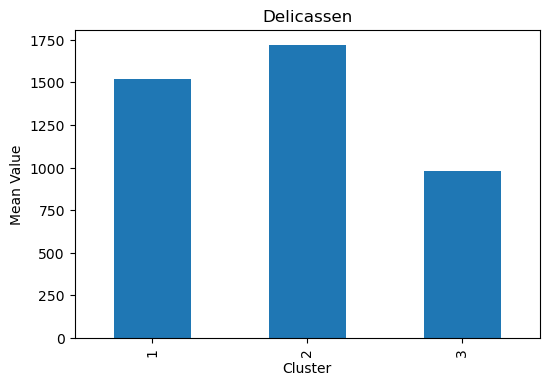

In [71]:
# Transpose the DataFrame so that the features are the rows (this will make plotting easier)
cluster_means = cluster_means.transpose()

# Create bar plot for each feature
for feature in cluster_means.index:
    cluster_means.loc[feature].plot(kind='bar', figsize=(6,4))
    plt.title(feature)
    plt.ylabel('Mean Value')
    plt.show()

## As seen in the graph the numbers are higher for features belonging to a particular cluster (i.e features are not divided along the different clusters equally)

-------------------

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

#### PCA is used for dimension reduction on the features, we will start with the model and let it decide the features and then plot the Scree Plot to check how many dimensions explains most of the variance

In [72]:
from sklearn.decomposition import PCA

n_components = None  #We will let the PCA decide the components to keep
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(data_scaled)

In [73]:
# checking the variance explained by the principal components from the PCA model
explained_variance = pca.explained_variance_ratio_

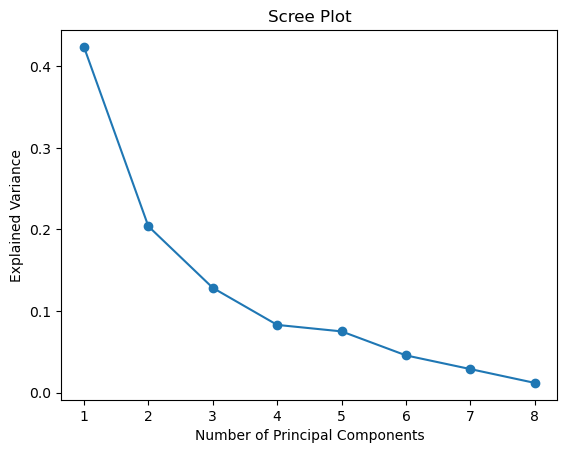

In [74]:
# creating a scree plot for explained_variance for all components and selcting the efficient number of components 
import matplotlib.pyplot as plt

plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance')


plt.show()

#### We can see after 4 th component the variance starts to level off, so we can conclude that 4 principle components will explain most of the variance

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

(1) Data is not normally distributed.

(2) Clustering Algorithms are sensitive to outliers

(3) Hierchical Clustering is more effective then KMeans

(4) 4 principle components components will explain most of the variance(found through PCA)